# NYC Taxi Trip Duration

## Questions 

What Questions to asked to find trip ETA before trip starts

1. Start and End point to find distance
2. How many routes to reach the destination and which the shortest one 
3. Weather condition
4. Traffic details 
5. Time of Trip to check if it is peak time or office timings ?
6. Day of trip to see if it's on weekend or weekday ?
7. Holiday day or not ?
8. Trip is shared/ carpooling ?
9. Any ongoing Protest on streets ?
10. Any construction work going on ?
11. Car speed - If Driver going on regular speed limits, slow or fast 

## EDA - Exploratory  Analysis

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Reading data

df = pd.read_csv('./nyc_taxi_trip_duration.csv')

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [7]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

In [8]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [58]:
# Convert datetime fields from object to python datetime
from datetime import datetime
def convert_to_datetime(X):
    datetime_format = "%Y-%m-%d %H:%M:%S"
    obj = datetime.strptime(X, datetime_format)
    return obj

In [59]:
# Convert String datetime column to datetime column
df['pickup_datetime'] = df['pickup_datetime'].apply(convert_to_datetime)
df['dropoff_datetime'] = df['dropoff_datetime'].apply(convert_to_datetime)

In [60]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

In [61]:
# Coverting categorical columns to numerical for analysis and modelling

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

In [62]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
dtype: object

In [74]:
# Use Datetime column, split column in 4 categories - Year, Month, day, time 
# Convert datetime to timestamp
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_datetime_year'] = df['pickup_datetime'].dt.year
df['pickup_datetime_month'] = df['pickup_datetime'].dt.month
df['pickup_datetime_day'] = df['pickup_datetime'].dt.day
df['pickup_datetime_hour'] = df['pickup_datetime'].dt.hour
df['pickup_datetime_minute'] = df['pickup_datetime'].dt.minute
df['pickup_datetime_second'] = df['pickup_datetime'].dt.second
df['pickup_datetime'] = df['pickup_datetime'].astype(int) / 10**9


In [75]:
df['dropoff_datetime_year'] = df['dropoff_datetime'].dt.year
df['dropoff_datetime_month'] = df['dropoff_datetime'].dt.month
df['dropoff_datetime_day'] = df['dropoff_datetime'].dt.day
df['dropoff_datetime_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_datetime_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_datetime_second'] = df['dropoff_datetime'].dt.second
df['dropoff_datetime'] = df['dropoff_datetime'].astype(int) / 10**9

In [76]:
# Separate datetime, string, and numerical columns
target = 'trip_duration'
datetime_columns = df.select_dtypes(include=['datetime']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.to_list()
numeric_columns.remove(target)



### Finding Missing Values

In [77]:
df.isna().sum()

id                         0
vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
store_and_fwd_flag         0
trip_duration              0
day_of_week                0
pickup_datetime_year       0
pickup_datetime_month      0
pickup_datetime_day        0
pickup_datetime_hour       0
pickup_datetime_minute     0
pickup_datetime_second     0
dropoff_datetime_year      0
dropoff_datetime_month     0
dropoff_datetime_day       0
dropoff_datetime_hour      0
dropoff_datetime_minute    0
dropoff_datetime_second    0
dtype: int64

In this notebook we will cover 3 Types of Analysis:
- Univariate - 1 variable 
- Bivariate - 2 variables (Numerical to Numerical, numerical to categorical, categorical to categorical)
- Multivariate - more than 2 variables

Hypothesis testing (Z-Test)

## Univariate Analysis

In [54]:
numeric_columns

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_datetime_year',
 'pickup_datetime_month',
 'pickup_datetime_day',
 'pickup_datetime_hour',
 'pickup_datetime_minute',
 'pickup_datetime_second',
 'dropoff_datetime_year',
 'dropoff_datetime_month',
 'dropoff_datetime_day',
 'dropoff_datetime_hour',
 'dropoff_datetime_minute',
 'dropoff_datetime_second']

### Passengers frequency Count Plot

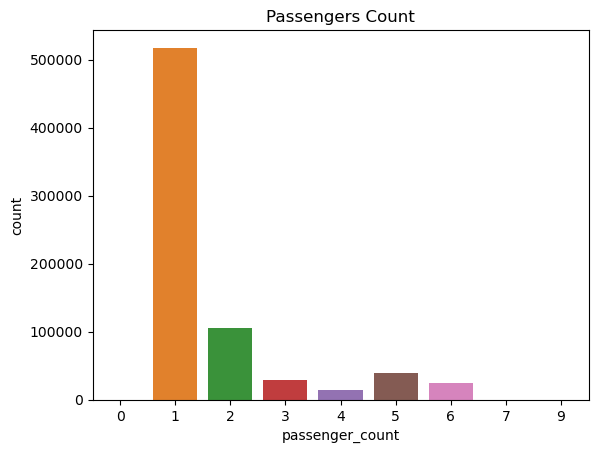

In [99]:
# As Passenger count is a discrete variable (work similar to categorical var) we use countplots to visualize
sns.countplot(df, x='passenger_count')
plt.title('Passengers Count')
plt.show()

<b>INFERENCE:</b>
- It shows that most of the trips have <b>solo travelers</b>.
- second most trips have 2 passengers but still there is a big gap in individual traveller and more than 1 traveller.

### Which day of the week has most trips ?

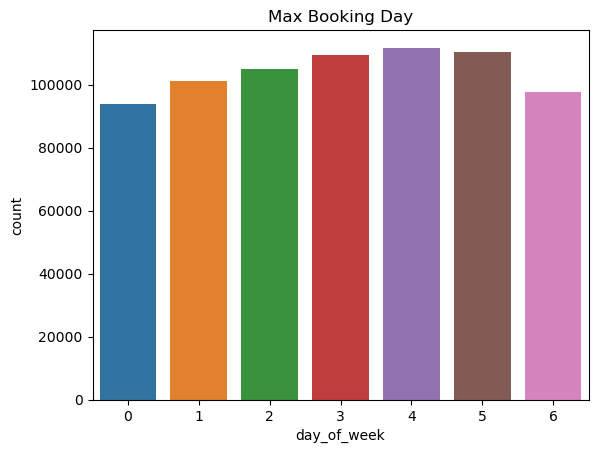

In [98]:
# As Day of Week (0-6) is a discrete variable (work similar to categorical var) we use countplot to visualize
sns.countplot(df, x='day_of_week')
plt.title('Max Booking Day')
plt.show()

<b>INFERENCE:</b>
- Here we can observe that most trip are booked on Fridays and Saturdays, so wait time will be more on these days
- Due to more trips, there is expected to increrase the trip duration time 

### What Time has most trips ?

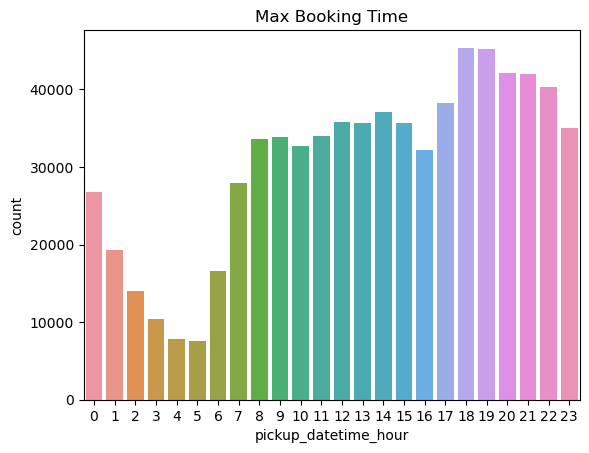

In [97]:
# As Day of Week (0-6) is a discrete variable (work similar to categorical var) we use countplot to visualize
sns.countplot(df, x='pickup_datetime_hour', fill=True)
plt.title('Max Booking Time')
plt.show()

/Users/jaskaransingh/anaconda3/envs/av/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


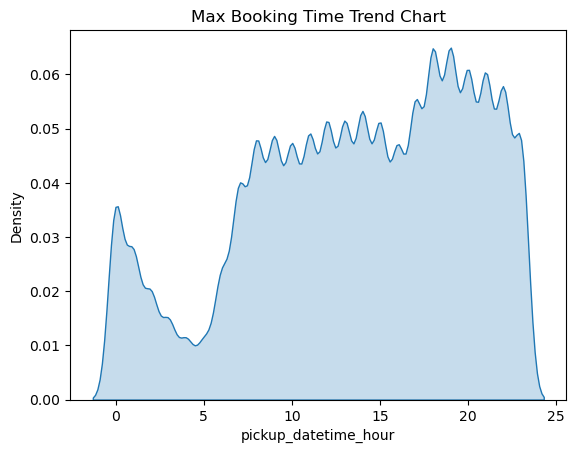

In [100]:
sns.kdeplot(df, x='pickup_datetime_hour', fill=True)
plt.title('Max Booking Time Trend Chart')
plt.show()

<b>INFERENCE: </b>
- It is observed that the most trips are booked during the time of 6-10 pm 
- Peak Time is 6-7 pm. 
- So longer wait time is expected during this time period
- Less Booking timings is in night from 1- 6 am

### At what time trip duration is maximum ?

/var/folders/_m/191trqr11qx1b8gfthg50s_40000gn/T/ipykernel_22738/106259369.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_data, x='pickup_datetime_hour', y='trip_duration', ci=None)


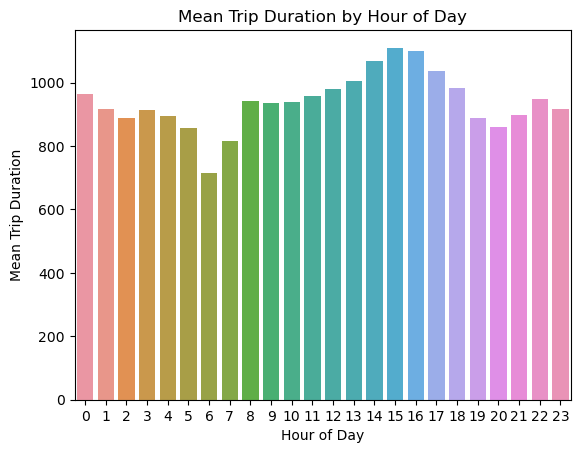

In [95]:

# Group by 'pickup_datetime_hour' and calculate the mean of 'trip_duration'
grouped_data = df.groupby('pickup_datetime_hour')['trip_duration'].mean().reset_index()

# Plot the bar plot using Seaborn
sns.barplot(data=grouped_data, x='pickup_datetime_hour', y='trip_duration', ci=None)

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Mean Trip Duration')
plt.title('Mean Trip Duration by Hour of Day')

# Show the plot
plt.show()

<b>INFERENCE: </b>
- Longest Trip is in time period of 2-5 pm
- Shortest Trip is in night from 5-7 am

#### Any Outliers in Trip Duration Time

<Axes: ylabel='trip_duration'>

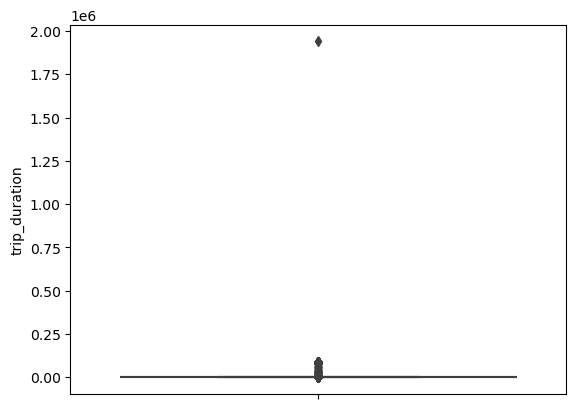

In [49]:
sns.boxplot(df, y='trip_duration')

#### Inference:
It is clear that there are some outliers in the data

### Univariate Analysis - Numeric Columns

In [102]:
# custom function for easy and efficient analysis of numerical variables

def UVA_numeric(data, var_group):
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i-th variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of a variable
        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max() - data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # calculating points for range of data within one standard deviation from mean
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,size,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel(f'{i}', fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

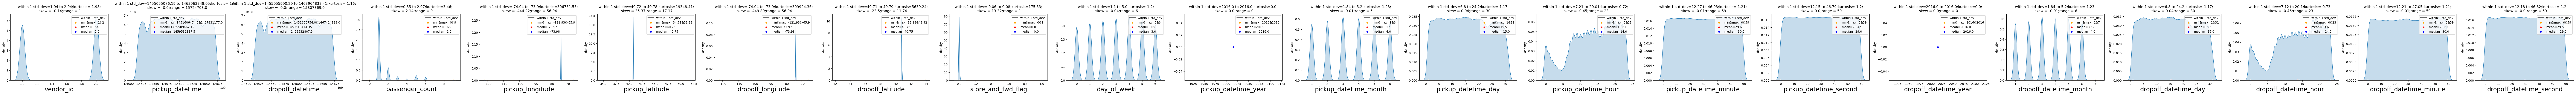

In [105]:
import warnings
warnings.filterwarnings('ignore')
UVA_numeric(data = df, var_group = numeric_columns)

**INFERENCE:**
- need to remove outliers in pickup and drop off longitude and latitude 

In [110]:
loc_cols = ['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']
loc_data = df[loc_cols]

In [112]:
# standard deviation factor
factor = 3

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
loc_data = loc_data[loc_data['pickup_longitude'] < loc_data['pickup_longitude'].mean() + factor*loc_data['pickup_longitude'].std()]
loc_data = loc_data[loc_data['pickup_latitude'] < loc_data['pickup_latitude'].mean() + factor*loc_data['pickup_latitude'].std()]
loc_data = loc_data[loc_data['dropoff_longitude'] < loc_data['dropoff_longitude'].mean() + factor*loc_data['dropoff_longitude'].std()]
loc_data = loc_data[loc_data['dropoff_latitude'] < loc_data['dropoff_latitude'].mean() + factor*loc_data['dropoff_latitude'].std()]

# checking how many points removed
len(df), len(loc_data)

(729322, 723325)

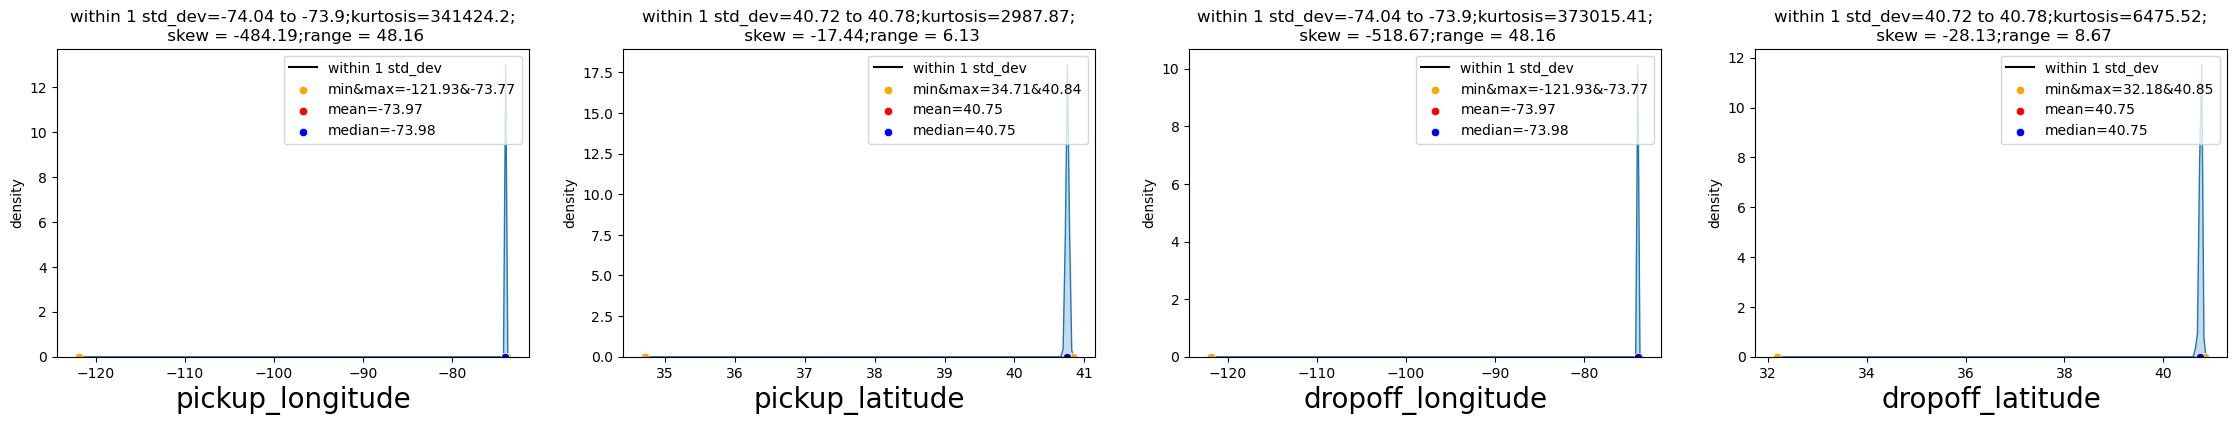

In [113]:
UVA_numeric(loc_data, loc_cols)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.


### Univariate Analysis - Categorical variables

In [116]:
df.select_dtypes(exclude=['int64','float64','Int64', 'int32']).dtypes

id    object
dtype: object

In [117]:
def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi=100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(x=norm_count, y=norm_count.index , order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel(f'{i}', fontsize = 20)
        plt.title(f'n_uniques = {n_uni} \n value counts \n {norm_count}')

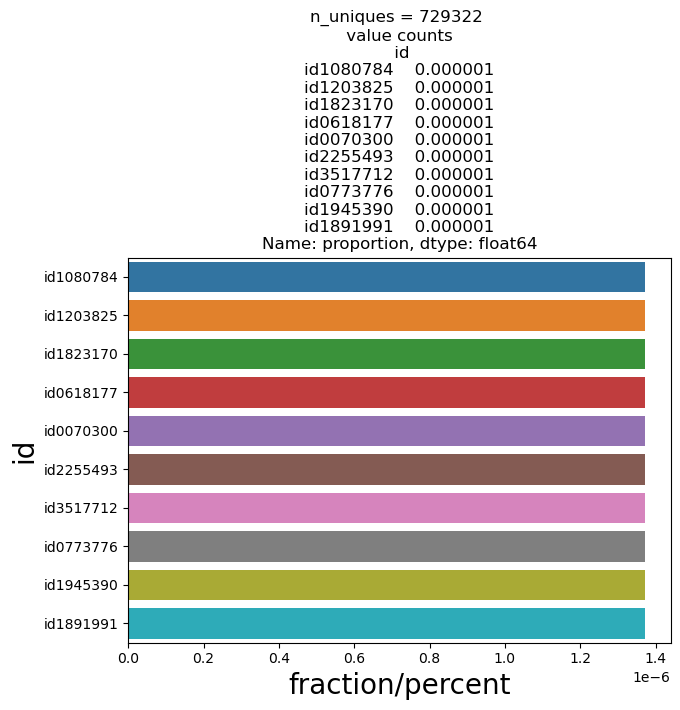

In [126]:
UVA_category(df, ['id',])

In [ ]:
#Plotting "city" for top 15 cities
plt.figure(figsize = (10,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)[:15]
sns.barplot(x=city_count.index, y=city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')

### Finding Outliers

In [127]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
    Runs a loop: calculate all the descriptives of i-th variable and plot/print it

    data : dataframe from which to plot from
    var_group : [list] Group of Continuous variables
    include_outlier : [bool] whether to include outliers or not, default = True
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = round(data[i].quantile(0.25), 2)
        quant75 = round(data[i].quantile(0.75), 2)
        IQR = round(quant75 - quant25, 2)
        med = round(data[i].median(), 2)
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
            #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'With Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75};\n Outliers(low/high) = {(outlier_low,outlier_high)}')
      
        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1

            # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data2[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'With Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75}')

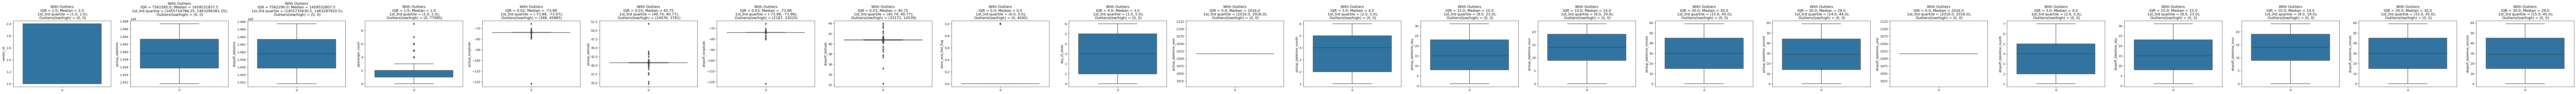

In [129]:
UVA_outlier(df, numeric_columns,)

<b>INFERENCE:</b>
- Outliers are clearly visibe in pickup and dropoff latitude, longitude

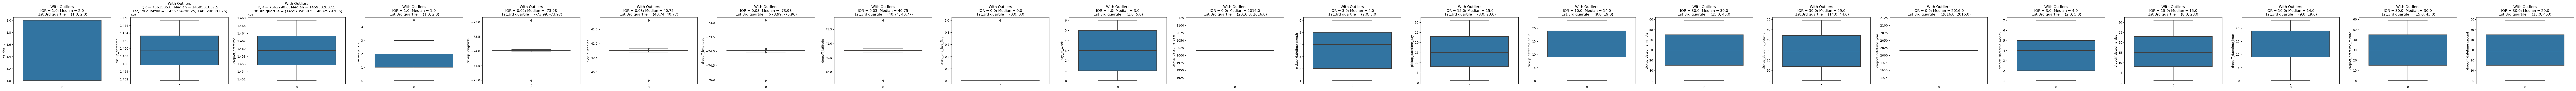

In [131]:
UVA_outlier(df, numeric_columns, include_outlier=False)